## Setup

In [1]:
from pathlib import Path
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import torch
import ast
import numpy as np
from numpy.random import default_rng
from typing import Tuple, Optional, Dict, Any

from src.utils import grid_search_dict

from fct import run_exp, pmmr_exp, kpv_exp, NMMR_exp, calc_haw, gen_haw, ha_effect, save_data

C:\Users\Benedikt\anaconda3new\envs\kompa\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Config

In [2]:
experiment_name = "mastourie"
n_sample = 1000
beta = np.sqrt(0.05)
sigma = np.sqrt(3)
a_start = -2
a_end = 2

data_dic = {
      "name" : experiment_name,
      "n_sample" : n_sample,
      "beta": beta,
      "sigma": sigma,
      "a_start": a_start,
      "a_end": a_end,
}

pmmr_configs = {
        "name": "pmmr",
        "lam1": np.logspace(np.log10(1/(450)**2), np.log10(0.25), 50),
        "lam2": 0.01,
        "scale": 0.5,
        "data_scaling": True
}

kpv_configs = {
        "name": "kpv",
        "lam1_max": 0.01,
        "lam1_min":  0.0001,
        "n_lam1_search": 25,
        "lam2_max": 0.01,
        "lam2_min": 0.0001,
        "n_lam2_search": 25,
        "split_ratio": 0.5,
        "scale": 0.5,
        "data_scaling": True,
}

In [27]:
# sd_list = [5949, 7422, 4388, 2807, 5654, 5518, 1816, 1102, 9886, 1656,
#            4379, 2029, 8455, 4987, 4259, 2533, 9783, 7987, 1009, 2297]
# now = datetime.datetime.now()
# time_string = now.strftime("%Y_%m_%d_%H_%M_%S")
# exp_name = experiment_name
# model_name = "pmmr"
# dump_dir = Path.cwd().joinpath('dumps')
# exp_dir = dump_dir.joinpath(f"experiment_{exp_name}_n_sample_{n_sample}")
# model_dir = exp_dir.joinpath(f"model_{model_name}")
# time_dir = model_dir.joinpath(f"time_{time_string}")
# if not os.path.exists(dump_dir):
#     os.mkdir(dump_dir)
# if not os.path.exists(exp_dir):
#     os.mkdir(exp_dir)
# if not os.path.exists(model_dir):
#     os.mkdir(model_dir)
# if not os.path.exists(time_dir):
#     os.mkdir(time_dir)
# time_dir.joinpath(f"results_sd_{sd_list}.csv")
# sd_concat = '_'.join(map(str, sd_list))
# np.save(time_dir.joinpath(f"pred_all_sd_{sd_concat}.txt"), [1])

## Evaluations

#### Grid search is unfair for KPV!

In [3]:
%%time
sd_list = [5949, 7422, 4388, 2807, 5654, 5518, 1816, 1102, 9886, 1656, 
           4379, 2029, 8455, 4987, 4259, 2533, 9783, 7987, 1009, 2297]

# save results
results_pmmr = run_exp(model_config = pmmr_configs, data_config=data_dic, sd_list=sd_list)
print("PMMR finished")

Finished with sd: 5949
Finished with sd: 7422
Finished with sd: 4388
Finished with sd: 2807
Finished with sd: 5654
Finished with sd: 5518
Finished with sd: 1816
Finished with sd: 1102
Finished with sd: 9886
Finished with sd: 1656
Finished with sd: 4379
Finished with sd: 2029
Finished with sd: 8455
Finished with sd: 4987
Finished with sd: 4259
Finished with sd: 2533
Finished with sd: 9783
Finished with sd: 7987
Finished with sd: 1009
Finished with sd: 2297
PMMR finished
CPU times: total: 1h 44min 43s
Wall time: 29min 37s


In [4]:
%%time
results_kpv = run_exp(model_config = kpv_configs, data_config=data_dic, sd_list=sd_list)
print("KPV finished")

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Finished with sd: 5949
Finished with sd: 7422
Finished with sd: 4388
Finished with sd: 2807
Finished with sd: 5654
Finished with sd: 5518
Finished with sd: 1816
Finished with sd: 1102
Finished with sd: 9886
Finished with sd: 1656
Finished with sd: 4379
Finished with sd: 2029
Finished with sd: 8455
Finished with sd: 4987
Finished with sd: 4259
Finished with sd: 2533
Finished with sd: 9783
Finished with sd: 7987
Finished with sd: 1009
Finished with sd: 2297
KPV finished
CPU times: total: 1h 36min 33s
Wall time: 20min 1s


In [5]:
df_save = pd.DataFrame(columns=['model', 'pred_avg', 'train_data', 'test_data', 'pred_all', 
                                'mse_avg', 'mae_avg', 'mse_all', 'mae_all', 'param_opt', 'error', 
                                'std', 'error_abs', 'std_abs', 'model_config', 'data_config'])
df_save = df_save.append([results_pmmr, results_kpv])
save_data(df_save, data_dic)

In [6]:
df_save

,model,pred_avg,train_data,test_data,pred_all,mse_avg,mae_avg,mse_all,mae_all,param_opt,error,std,error_abs,std_abs,model_config,data_config,sd_list
0,pmmr,"[0.2582983924223214, 0.2793472720859641, 0.300...","([[0.18315767151498352], [0.20712363024542205]...","([[-2.0], [-1.9595959595959596], [-1.919191919...","[[0.23986351810515188, 0.32673321629128527, 0....",0.226734,0.412213,"[0.20897400112325426, 0.2207820420579199, 0.21...","[0.39583520668192934, 0.37533797698795435, 0.4...","[0.0019309726158312913, 0.0002116906213593919,...","[[0.325861380384553, 0.2389916821984196, 0.291...","[[0.05254913806726968], [0.05573050302789807],...","[[0.325861380384553, 0.2389916821984196, 0.291...","[[0.05254913806726968], [0.05573050302789807],...","{'name': 'pmmr', 'lam1': [4.938271604938276e-0...","{'name': 'mastourie', 'n_sample': 1000, 'beta'...","[5949, 7422, 4388, 2807, 5654, 5518, 1816, 110..."
1,kpv,"[0.9701456, 1.0236484, 1.0749773, 1.1234915, 1...","([[0.18315767151498352], [0.20712363024542205]...","([[-2.0], [-1.9595959595959596], [-1.919191919...","[[0.9693678, 1.1302933, 0.7524338, 1.0265931, ...",0.243633,0.418019,"[0.18250452, 0.28698516, 0.20256671, 0.2276080...","[0.3627908, 0.44665423, 0.3878019, 0.41070095,...","[[0.01, 0.0001], [0.01, 0.0001], [0.01, 0.0001...","[[-0.40364290365339206, -0.5645683515942185, -...","[[0.2250146770426679], [0.23117794870263825], ...","[[0.40364290365339206, 0.5645683515942185, 0.1...","[[0.2207274246703465], [0.23117794870263825], ...","{'name': 'kpv', 'lam1_max': 0.01, 'lam1_min': ...","{'name': 'mastourie', 'n_sample': 1000, 'beta'...","[5949, 7422, 4388, 2807, 5654, 5518, 1816, 110..."


### Plot

#### Get Data

In [7]:
# results_pmmr = df_save[df_save["model"] == "pmmr"].to_dict(orient='records')[0]
# results_kpv = df_save[df_save["model"] == "kpv"].to_dict(orient='records')[0]
# results_nmmr_u = df_save[df_save["model"] == "nmmr_U_statistic"].to_dict(orient='records')[0]
# results_nmmr_v = df_save[df_save["model"] == "nmmr_V_statistic"].to_dict(orient='records')[0]

A_train = np.squeeze(results_pmmr["train_data"].treatment)
Y_train = np.squeeze(results_pmmr["train_data"].outcome)
A_test = np.squeeze(results_pmmr["test_data"].treatment)
Y_test = np.squeeze(results_pmmr["test_data"].structural)

Y_pred_pmmr = results_pmmr["pred_avg"]
Y_pred_kpv = results_kpv["pred_avg"]


std_pmmr = np.squeeze(results_pmmr["std"])
std_kpv = np.squeeze(results_kpv["std"])


std_pmmr_abs = np.squeeze(results_pmmr["std_abs"])
std_kpv_abs = np.squeeze(results_kpv["std_abs"])


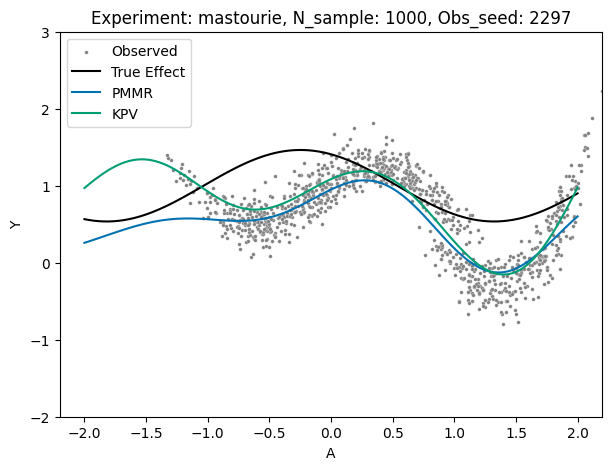

In [8]:
import importlib
importlib.reload(plt)


plt.style.use('seaborn-colorblind')
plt.figure(figsize=(7, 5))
# Obs & True values
sns.scatterplot(x=A_train, y=Y_train, color='gray', label='Observed', s=7)
plt.plot(A_test, Y_test, color='black', label="True Effect", linestyle="solid")

# Predictions
plt.plot(A_test, Y_pred_pmmr,  label="PMMR", linestyle="solid")
plt.plot(A_test, Y_pred_kpv,  label="KPV", linestyle="solid")


plt.title(f'Experiment: {experiment_name}, N_sample: {n_sample}, Obs_seed: {sd_list[-1]}')
plt.xlabel('A')
plt.xlim([-2.2, 2.2])
plt.ylabel('Y')
plt.ylim([-2, 3])
plt.legend()
plt.savefig(f"plots/plot_experiment_{experiment_name}_n_sample_{n_sample}_obs_seed_{sd_list[-1]}", dpi = 300, format="pdf")
plt.show()

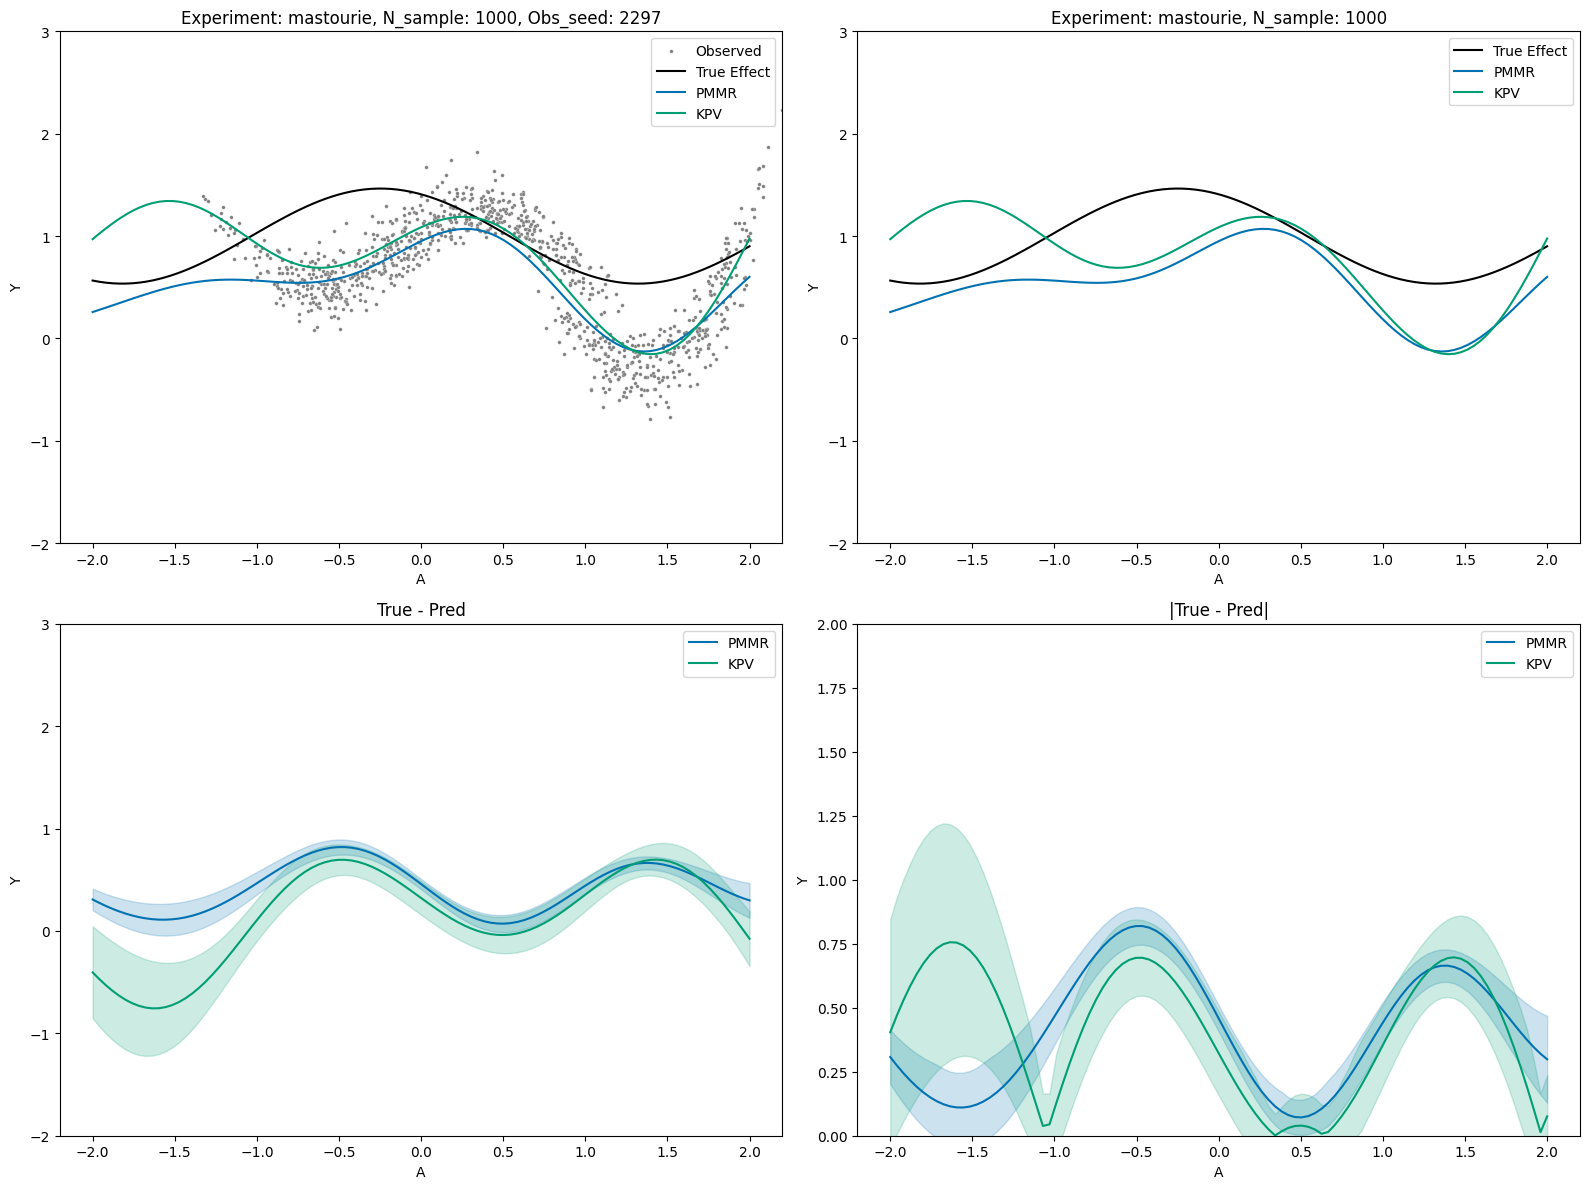

In [9]:
import importlib
importlib.reload(plt)

plt.style.use('seaborn-colorblind')
fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(2, 2, 1)
sns.scatterplot(x=A_train, y=Y_train, color='gray', label='Observed', s=7, ax=ax1)
ax1.plot(A_test, Y_test, color='black', label="True Effect", linestyle="solid")
ax1.plot(A_test, Y_pred_pmmr,  label="PMMR", linestyle="solid")
ax1.plot(A_test, Y_pred_kpv,  label="KPV", linestyle="solid")


ax1.set_title(f'Experiment: {experiment_name}, N_sample: {n_sample}, Obs_seed: {sd_list[-1]}')
ax1.set_xlabel('A')
ax1.set_xlim([-2.2, 2.2])
ax1.set_ylabel('Y')
ax1.set_ylim([-2, 3])
ax1.legend()

####

ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(A_test, Y_test, color='black', label="True Effect", linestyle="solid")
ax2.plot(A_test, Y_pred_pmmr,  label="PMMR", linestyle="solid")
ax2.plot(A_test, Y_pred_kpv,  label="KPV", linestyle="solid")


ax2.set_title(f'Experiment: {experiment_name}, N_sample: {n_sample}')
ax2.set_xlabel('A')
ax2.set_xlim([-2.2, 2.2])
ax2.set_ylabel('Y')
ax2.set_ylim([-2, 3])
ax2.legend()

### True vs Pred
alpha = 0.2
ax3 = fig.add_subplot(2, 2, 3)
line, = ax3.plot(A_test, Y_test - Y_pred_pmmr,  label="PMMR", linestyle="solid")
color = line.get_color()
ax3.fill_between(A_test, Y_test - Y_pred_pmmr - 2*std_pmmr, Y_test - Y_pred_pmmr + 2*std_pmmr, alpha=alpha, color=color)

line, = ax3.plot(A_test, Y_test - Y_pred_kpv,  label="KPV", linestyle="solid")
color = line.get_color()
ax3.fill_between(A_test, Y_test - Y_pred_kpv - 2*std_kpv, Y_test - Y_pred_kpv + 2*std_kpv, alpha=alpha, color=color)

ax3.set_title('True - Pred')
ax3.set_xlabel('A')
ax3.set_xlim([-2.2, 2.2])
ax3.set_ylabel('Y')
ax3.set_ylim([-2, 3])
ax3.legend()

#### | True - Pred|
alpha = 0.2
ax4 = fig.add_subplot(2, 2, 4)

line, = ax4.plot(A_test, np.abs(Y_test - Y_pred_pmmr),  label="PMMR", linestyle="solid")
color = line.get_color()
ax4.fill_between(A_test, np.abs(Y_test - Y_pred_pmmr) - 2*std_pmmr_abs, np.abs(Y_test - Y_pred_pmmr) + 2*std_pmmr_abs, alpha=alpha, color=color)

line, = ax4.plot(A_test, np.abs(Y_test - Y_pred_kpv),  label="KPV", linestyle="solid")
color = line.get_color()
ax4.fill_between(A_test, np.abs(Y_test - Y_pred_kpv) - 2*std_kpv_abs, np.abs(Y_test - Y_pred_kpv) + 2*std_kpv_abs, alpha=alpha, color=color)

ax4.set_title('|True - Pred|')
ax4.set_xlabel('A')
ax4.set_xlim([-2.2, 2.2])
ax4.set_ylabel('Y')
ax4.set_ylim([0, 2])
ax4.legend()


###########
plt.tight_layout()
time_stamp = datetime.datetime.now()
time_string = time_stamp.strftime("%Y_%m_%d_%H_%M_%S")
plt.savefig(f"plots/only_kpv_all_plot_experiment_{experiment_name}_n_sample_{n_sample}_obs_seed_{sd_list[-1]}_n_seed_{len(sd_list)}_time_{time_string}", dpi = 300, format="pdf")
plt.show()
